✨✨This notebook is part of my **Explainable AI (XAI) Series** 🕵️‍♂️, where I explore techniques that make machine learning models and processes more transparent and interpretable. In this series, I focus on methods that not only improve model performance but also provide insights into how and why models make decisions.

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

np.random.seed(42)  # For reproduciobility reasons

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/high-dimensional-datascape/all_data.csv


---

# 🧠XAI Series 🕵️‍♂️ Dimensionality Reduction

In this notebook, we explore dimensionality reduction techniques using Kaggle's [High Dimensional Datascape](https://www.kaggle.com/datasets/krishd123/high-dimensional-datascape/data) dataset. With its large number of features, this dataset is ideal for understanding and comparing methods that simplify high-dimensional data while retaining meaningful information.

We will analyze and visualize the following key techniques:
1. *Principal Component Analysis (PCA)*:
   <span style="color:lightgrey">A linear technique that projects data onto orthogonal axes of maximum variance, often used for visualization and preprocessing.</span>
3. *t-Distributed Stochastic Neighbor Embedding (t-SNE)*:
   <span style="color:lightgrey">A non-linear, probabilistic technique primarily for visualizing high-dimensional data in 2D or 3D space while preserving local structure.</span>
5. *Uniform Manifold Approximation and Projection (UMAP)*:
   <span style="color:lightgrey">A non-linear method that balances local and global structure preservation, offering faster and more scalable alternatives to t-SNE.</span>
7. *Linear Discriminant Analysis (LDA)*:
   <span style="color:lightgrey">Supervised linear reduction for maximizing class separability.</span>

To investigate and understand the differences between these methods, we will:
- **Compare and visualize results** to identify how each technique reduces dimensionality.
- **Analyze when to use linear vs. non-linear methods** based on the data's characteristics and objectives.

By the end of this notebook, you will gain hands-on experience applying and evaluating various dimensionality reduction techniques to simplify complex datasets while maintaining insights critical for analysis and interpretation.

In [2]:
data = pd.read_csv('/kaggle/input/high-dimensional-datascape/all_data.csv')
print(f"Rows: {data.shape[0]:,}")
print(f"Cols: {data.shape[1]:,}")
data.head()

Rows: 230
Cols: 537


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 527,Unnamed: 528,Unnamed: 529,Unnamed: 530,Unnamed: 531,Unnamed: 532,Unnamed: 533,Unnamed: 534,Unnamed: 535,Label
0,-0.000133,0.000262,0.001099,0.001834,0.002109,0.002223,0.002233,0.002036,0.001582,0.000969,...,0.82953,2.9079,3.7557,1.3344,0.74247,0.22507,0.56249,1.5705,0.79906,0
1,-0.000842,-0.001011,-0.001071,-0.000944,-0.000794,-0.000610,-0.000445,-0.000173,0.000077,0.000285,...,0.84335,3.0110,3.9877,1.2461,0.74423,0.22567,0.61034,1.6645,0.74574,0
2,-0.000766,-0.000535,0.000162,0.000898,0.001287,0.001582,0.001704,0.001659,0.001574,0.001438,...,0.87413,3.0613,3.9749,1.1560,0.52508,0.19934,0.45707,1.3386,0.74574,0
3,-0.000301,-0.000377,-0.000451,-0.000529,-0.000685,-0.000845,-0.000899,-0.000822,-0.000550,-0.000182,...,0.85467,3.3337,3.9205,1.3341,0.46024,0.20031,0.45924,1.7969,0.32451,0
4,-0.000589,-0.000857,-0.001135,-0.001171,-0.001128,-0.001039,-0.000959,-0.000937,-0.000916,-0.000819,...,0.82978,3.5814,3.7667,1.1151,0.44572,0.20538,0.41882,1.4422,0.32451,0


Except the target column `Label`, all columns are called with `Unnamed` in their name. We rename them to to able to easier work with them.

In [3]:
# Rename unnamed columns
data.columns = [f"Feature_{i+1}" for i in range(data.shape[1]-1)] + ['Label']
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_528,Feature_529,Feature_530,Feature_531,Feature_532,Feature_533,Feature_534,Feature_535,Feature_536,Label
0,-0.000133,0.000262,0.001099,0.001834,0.002109,0.002223,0.002233,0.002036,0.001582,0.000969,...,0.82953,2.9079,3.7557,1.3344,0.74247,0.22507,0.56249,1.5705,0.79906,0
1,-0.000842,-0.001011,-0.001071,-0.000944,-0.000794,-0.000610,-0.000445,-0.000173,0.000077,0.000285,...,0.84335,3.0110,3.9877,1.2461,0.74423,0.22567,0.61034,1.6645,0.74574,0
2,-0.000766,-0.000535,0.000162,0.000898,0.001287,0.001582,0.001704,0.001659,0.001574,0.001438,...,0.87413,3.0613,3.9749,1.1560,0.52508,0.19934,0.45707,1.3386,0.74574,0
3,-0.000301,-0.000377,-0.000451,-0.000529,-0.000685,-0.000845,-0.000899,-0.000822,-0.000550,-0.000182,...,0.85467,3.3337,3.9205,1.3341,0.46024,0.20031,0.45924,1.7969,0.32451,0
4,-0.000589,-0.000857,-0.001135,-0.001171,-0.001128,-0.001039,-0.000959,-0.000937,-0.000916,-0.000819,...,0.82978,3.5814,3.7667,1.1151,0.44572,0.20538,0.41882,1.4422,0.32451,0


Now we have 536 clean named columns `Feature_1`, ..., `Feature_536` and one target column `Label`.  

## PCA

⚡**TL;DR**⚡
> $\textcolor{#ba4e00}{\textbf{Principal Component Analysis}}$ = PCA
- Focus is on capturing global linear relationships in the data. 
- Should be used to simplify and find global linear relationships and patterns in the data.

🔍**More Specifically**🔍

PCA is a **linear dimensionality reduction technique** that helps simplify high-dimensional data by projecting it onto a lower-dimensional space. It does so while retaining as much information (variance) as possible.

In the context of **Explainable AI (XAI)**, PCA is particularly valuable because it can:
- **Reduce complexity** in models without significant loss of information.
- **Visualize high-dimensional data** in 2D or 3D, making it easier for humans to interpret patterns.
- **Identify key features** or directions (principal components) that explain the most variance in the data.

In [4]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(data_scaled)

### How PCA Works

1. **Standardization:**
    - Since PCA is sensitive to scale, the data is standardized so that each feature has a mean of 0 and unit variance.
2. **Covariance Matrix:**
    - PCA computes the covariance matrix of the features to understand how they vary with each other.
3. **Eigenvectors and Eigenvalues:**
    - Eigenvectors represent the directions (principal components) in which the data varies the most.
    - Eigenvalues represent the magnitude of variance explained by each principal component.
4. **Projection:**
    - The data is then projected onto the principal components in descending order of explained variance. The first component captures the most variance, the second captures the next most, and so on.

In [5]:
explained_variance = pca.explained_variance_ratio_

In [6]:
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

We start with plotting the explained variance. 

$\textcolor{#ba4e00}{\textbf{Explained Variance Plot}}$:
Shows how much variance each principal component captures, which helps to decide how many components to retain.

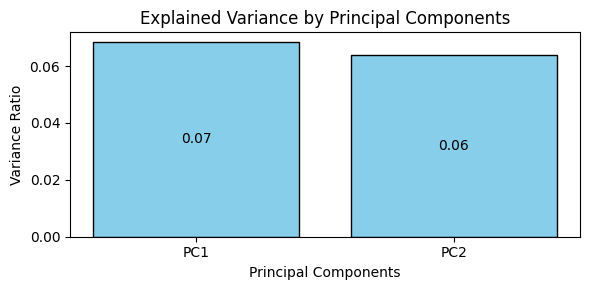

In [7]:
fig, axs = plt.subplots(figsize=(6, 3))

bars = axs.bar(
    x=["PC1", "PC2"], 
    height=explained_variance, 
    color="skyblue", 
    edgecolor="black",
    linewidth=1
)

for bar, value in zip(bars, explained_variance):
    height = bar.get_height()
    axs.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f"{value:.2f}",
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

axs.set_title("Explained Variance by Principal Components")
axs.set_ylabel("Variance Ratio")
axs.set_xlabel("Principal Components")

plt.tight_layout()
plt.show()

$\textcolor{#ba4e00}{\textbf{Scatter Plot (PC1 vs PC2)}}$: Visualizes the data reduced to the number of dimensions, in our case, two. Now the patterns and relationships in the original high-dimensional data are easier to interpret.

Note that for this example we choose $2$ as the number of dimensions. This can be changed by the user of the technique depending on how dimensions the dataset should be reduces to. 

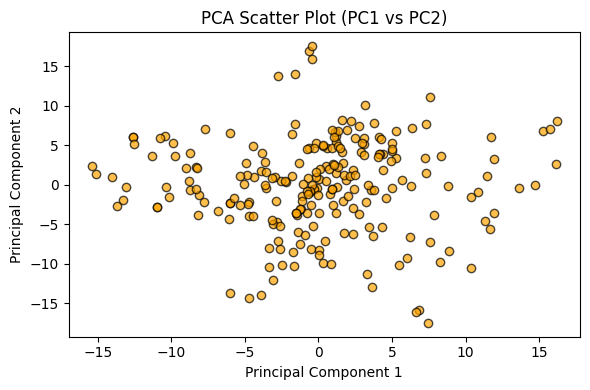

In [8]:
fig, axs = plt.subplots(figsize=(6, 4))

axs.scatter(pca_df["PC1"], pca_df["PC2"], c="orange", alpha=0.7, edgecolors="k")
axs.set_title("PCA Scatter Plot (PC1 vs PC2)")
axs.set_xlabel("Principal Component 1")
axs.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

### Working with More Dimensions

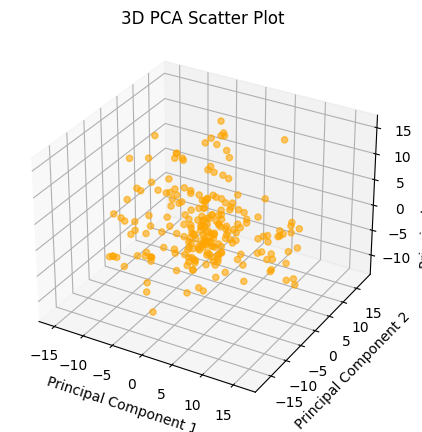

In [9]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c="orange", alpha=0.6)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Scatter Plot")
plt.show()

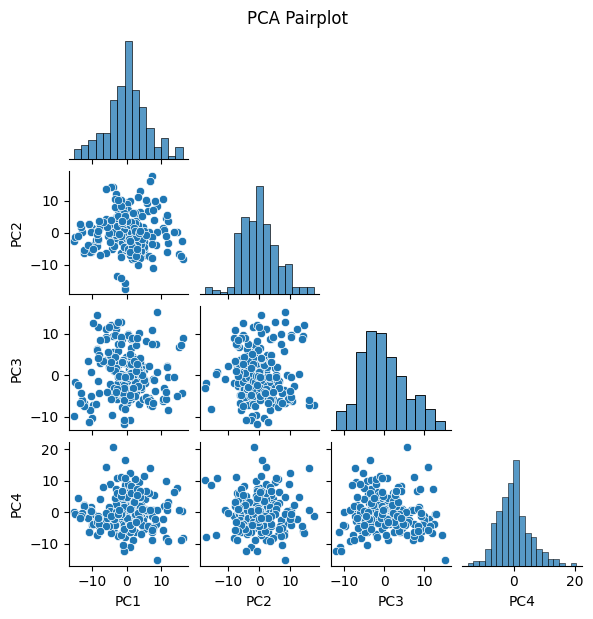

In [10]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"])

sns.pairplot(pca_df, height=1.5, corner=True)
plt.suptitle("PCA Pairplot", y=1.02, fontsize=12)
plt.show()

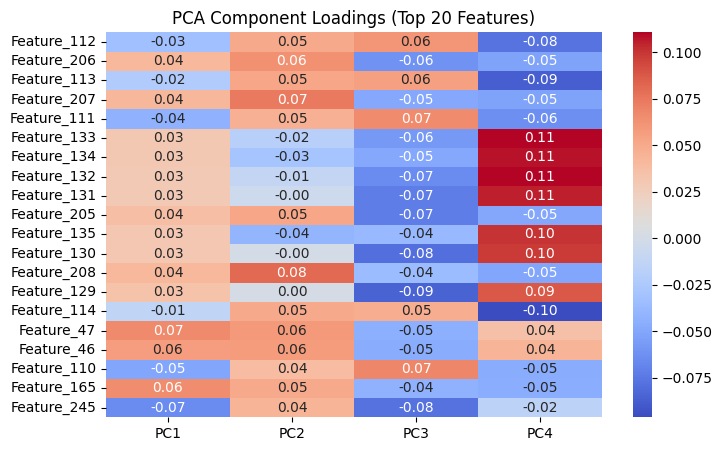

In [11]:
# Find top-N contributing features per component
top_n = 20
pca = PCA(n_components=4)
pca.fit(data_scaled)

loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f"PC{i+1}" for i in range(4)], 
    index=[f"Feature_{i+1}" for i in range(data.shape[1])]
)

# Get top-N absolute loadings for each principal component
top_features = loadings.abs().sum(axis=1).nlargest(top_n).index
filtered_loadings = loadings.loc[top_features]

plt.figure(figsize=(8, 5))
sns.heatmap(filtered_loadings, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"PCA Component Loadings (Top {top_n} Features)")
plt.show()


### Why Use PCA in XAI?

In Explainable AI, PCA helps to:
- **Simplify Interpretability**: Reducing dimensionality allows for clearer visualizations and understanding of data patterns.
- **Feature Importance**: By identifying which components contribute the most to variance, you can infer which features are most impactful.
- **Preprocessing**: Simplifying data can improve model performance and training efficiency for explainable models.

## t-SNE

> t-distributed stochastic neighbor embedding (t-SNE)

Involves constructing a lower dimensional representation where similar data points are placed closer together. 
- Should be used to emphasize visualization, reveal local patterns and clusters.

## UMAP

> Uniform manifold approximation and projection (UMAP)

Uses manifold learning and non-linear dimensionality reduction technique to understand the underlying structure or shape of the data. Focuses on capturing complex non-linear relationships in the data. 
- Should be used to preserve local structure and handle complex non-linear relationships.

## PaCMAP